## EECS 491 Assignment 1

## William Nourse wrn13

In [1]:
from scipy import stats # probability functions
import matplotlib.pyplot as plt # plotting utility
import numpy as np # other math
# display graphs with nicer Jupyter formatting (not with 'Out[]')
%matplotlib inline

### Q1. Basic probability (10 pts)

1.1. Prove (5 pts)
$$ p(x,y|z) = p(x|z)p(y|x,z) $$

Given:
$$ p(x|z) = \frac{p(x,z)}{p(z)} $$
$$ p(y|x,z) = \frac{p(y,x,z)}{p(x,z)} = \frac{p(x,y,z)}{p(x,z)} $$
Then:
$$ p(x|z)p(y|x,z) = \frac{p(x,z)}{p(z)}\frac{p(x,y,z)}{p(x,z)} $$
$$ p(x|z)p(y|x,z) = \frac{p(x,y,z)}{p(z)} $$
$$ p(x|z)p(y|x,z) = p(x,y|z) $$

1.2. Prove (5 pts)
$$ p(x|y,z) = \frac{p(y|x,z)p(x|z)}{p(y|z)} $$

Given:
$$ p(x|z) = \frac{p(x,z)}{p(z)} $$
$$ p(y|z) = \frac{p(y,z)}{p(z)} $$
$$ p(y|x,z) = \frac{p(y,x,z)}{p(x,z)} = \frac{p(x,y,z)}{p(x,z)} $$
$$ p(x|y,z) = \frac{p(x,y,z)}{p(y,z)} $$
Then:
$$ \frac{p(y|x,z)p(x|z)}{p(y|z)} = \frac{p(x,y,z)p(x,z)p(z)}{p(x,z)p(z)p(y,z)} $$
$$ \frac{p(y|x,z)p(x|z)}{p(y|z)} = \frac{p(x,y,z)}{p(y,z)} $$
$$ \frac{p(y|x,z)p(x|z)}{p(y|z)} = p(x|y,z) $$

### Q2. Independence (10 pts)

2.1 Show that independence is not transitive, i.e. 
$a \perp b \wedge b \perp c \nRightarrow a \perp c$. Define a joint probability distribution $p(a,b,c)$ for which the previous expression holds and provide an interpretation. (5 pts)

Let $\mathcal{P}$ be the set of hospital ids for patients with pneumonia, $a$ be the ids for males with pneumonia, $c$ be the ids for females with pneumonia, and $b$ be the ids for children with pneumonia.
$$\mathcal{P} = \{1,2,3,4,5,6,7,8,9,10\}, a = \{1,3,5,7,9\}, b = \{5,6,7,8\}, c = \{2,4,6,8,10\}$$
Then
$$p(a,b) = p(b,c) = \frac{2}{10}, p(a)p(b) = p(b)p(c) = \frac{5}{10}*\frac{4}{10} = \frac{20}{100} = \frac{2}{10}$$
So a and b are independent, and b and c are independent.
$$p(a,c) = 0, p(a)p(c) = \frac{5}{10}*\frac{5}{10} = \frac{1}{4} \neq 0$$
So a and c are not independent. Knowing whether an id corresponds to a child does not indicate whether that patient is male or female, however knowing if a patient is male also indicates if they are female.

2.2 Show that conditional independence does not imply marginal independence, i.e. $a \perp b | c \nRightarrow a \perp b$. Again provide an example. (5 pts)

We have two opaque candy dispensers, one with infinite red candies and one with infinite red candies and blue candies. Each dispenser gives one candy at a time. One of the dispensers is chosen at random. If $a$ is the probability that the first candy given is red, and $b$ is the probability that the second candy given is red, these probabilities are not independent since depending on the first candy we can infer which machine we are pulling from. However if we know which dispenser we are pulling from ($c$), then $a$ and $b$ are no longer independent.

### Q3. Inspector Clouseau re-revisited (20 pts)

3.1 Write a program to evaluate $p(B|K)$ in Example 1.3 in Barber. Write your code and choose your data representations so that it is easy to use it to solve the remaining questions. Show that it correctly computes the value in the example. (5 pts)

In [2]:
# Murderer = True, not murderer = False
dist = [[0,0,0.3], # B = False, M = False
       [0,1,0.2],  # B = False, M = True
       [1,0,0.6],  # B = True, M = False
       [1,1,0.1]]  # B = True, M = True

def getVal(dist,b,m): # get the probability value in the distribution at the given indices of b and m
    val = 0
    for item in dist:
        if (item[0] == b) and (item[1] == m):
            val = item[2]
    return val

def getTrue(dist,var):
    if var:
        b = 0
        m = 1
    else:
        b = 1
        m = 0
    val = getVal(dist,b,m)
    return val

def clouseau(dist,param): # get the probability that the desired person (param=0 is B, 1 is M) murdered the victim
    if param:
        var = 1
        other = 0
    else:
        var = 0
        other = 1
    pVar = getTrue(dist,var) # prior probability that var is True
    pOther = getTrue(dist,other) # prior probability that other is True
    pBothTrue = dist[3][2]
    numerator = pVar*(pBothTrue*pOther + pVar*(1-pOther))
    denominator = dist[2][2]*(dist[3][2]*dist[1][2] + dist[2][2]*(1-dist[1][2]))
    denominator = denominator + (1-dist[2][2])*(dist[1][2]*dist[1][2] + dist[0][2]*(1-dist[1][2]))
    probVar = numerator/denominator
    return probVar

print(clouseau(dist,0))

0.7281553398058251


3.2 Define a different distribution for $p(K|M,B)$.  Your new distribution should result in the outcome that $p(B|K)$ is either $<0.1$ or $>0.9$, i.e. reasonably strong evidence.  Use the original values of $p(B)$ and $p(M)$ from the example.  Provide (invent) a reasonable justification for the value of each entry in $p(K|M,B)$. (5 pts)

In [3]:
distNew = [[0,0,0.05], # B = False, M = False
       [0,1,0.2],  # B = False, M = True
       [1,0,0.6],  # B = True, M = False
       [1,1,0.05]]  # B = True, M = Tru

print(clouseau(distNew,0))

0.9018404907975459


3.3 Derive the equation for $p(M|K)$. (5 pts)

Using $b$ for the two states of $B$ and $m$ for the two states of $M$,
$$p(M|K) = \sum_{b}p(b,M|K)$$
$$p(M|K) = \sum_{b}\frac{p(b,M,K)}{p(K)}$$
$$p(M|K) = \frac{\sum_{b}p(K|b,M)p(b,M)}{\sum_{b,m}p(K|b,m),p(b,m)}$$
$$p(M|K) = \frac{p(M)\sum_{b}p(K|b,m)p(b)}{\sum_{m}p(m)\sum_{b}p(K|b,m)p(b)}$$

3.4 Calculate it's value for both the original $p(K|M,B)$ and the one you defined yourself. Is it possible to provide a summary of the main factors that contributed to the value?  Why/Why not?  Explain. (5 pts)

In [4]:
probMaidOld = clouseau(dist,1)
probMaidNew = clouseau(distNew,1)
print("Using Barber's distribution, the probability that the Maid was the murderer is ",probMaidOld)
print("Using my distribution, the probability that the Maid was the murderer is ", probMaidNew)

Using Barber's distribution, the probability that the Maid was the murderer is  0.06796116504854369
Using my distribution, the probability that the Maid was the murderer is  0.06748466257668713


The main factor that contributes to this value is the original prior, as that reduces the magnitude of the whole expression and remained unchanged between distributions.

### Q4. Biased views (20 pts)

4.1 Write a program that calculates the posterior distribution of the $\theta$ (probability of heads) from the Binomial distribution given $y$ heads out of $n$ trials.  Feel free to use a package where the necessary distributions are defined as primitives. (5 pts)

Using Bayes' rule,

$$ p(\theta|y,n) = \frac{p(y|\theta, n) p(\theta|n)}{p(y|n)}, $$

and if we also assume to have no information for the prior $p(\theta)$, then

$$ p(\theta|y,n) \propto p(y|\theta, n) \cdot 1.$$

Text(0.5, 1.0, '$p(\\theta|y=2,n=10)$')

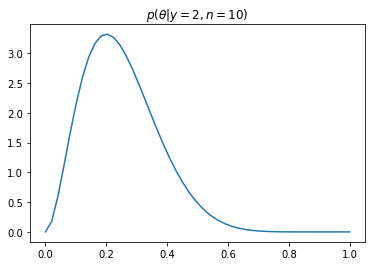

In [5]:
def calcBinomialPosterior(y,n,theta):
    # liklihood is the binomial distribution
    # we're using an uninformative prior p(theta)=1
    posterior = stats.binom.pmf(y,n,theta)*(n+1)
    
    return posterior

# Let's test it just to make sure the output looks reasonable
y = 2
n = 10
theta = np.linspace(0,1)
#posterior = calcBinomialPosteriorUninformed(y,n,theta)
#print(posterior)
fig = plt.figure()
plt.plot(theta,calcBinomialPosterior(y,n,theta))
plt.title(r'$p(\theta|y=2,n=10)$')

4.2 Imagine three different views on the coin bias:
- "I believe strongly that the coin is biased to either mostly heads or mostly tails."
- "I believe strongly that the coin is unbiased".
- "I don't know anything about the bias of the coin."

Define and plot prior distributions that expresses each of these beliefs.  Provide a brief explanation. (5 pts)

If we assume that the coin is mostly biased to heads or tails, then the shape of $p(\theta)$ should have peaks at $\theta=0$ and $\theta=1$ with a steep valley in between. This is because we're assuming the bias is probably at either extreme, but it could be somewhere in the middle. For this and the later priors, I am using the $\beta$-distribution due to its varied expression using only two parameters.

Text(0.5, 1.0, '$p(\\theta)$ Assuming Strong Bias to Mostly Heads or Mostly Tails')

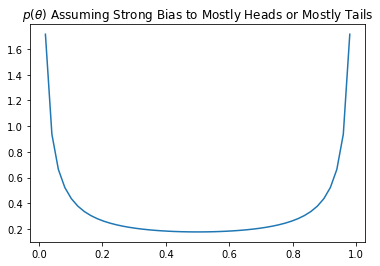

In [6]:
# biased to either mostly heads or mostly tails
fig1 = plt.figure()
beta1 = stats.beta(0.1,0.1)
plt.plot(theta,beta1.pdf(theta))
plt.title(r'$p(\theta)$ Assuming Strong Bias to Mostly Heads or Mostly Tails')

If we assume that the coin is unbiased, then that corresponds to a value of 0.5 for $\theta$. There should still be some probability on either side of 0.5 because we aren't 100% sure, but the peak should be pretty steep.

Text(0.5, 1.0, '$p(\\theta)$ Assuming no Bias')

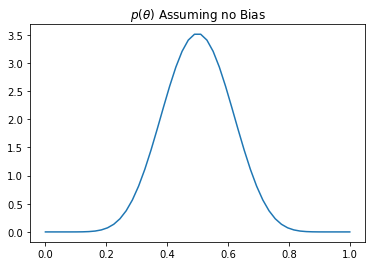

In [7]:
# no bias
fig2 = plt.figure()
beta2 = stats.beta(10,10)
plt.plot(theta,beta2.pdf(theta))
plt.title(r'$p(\theta)$ Assuming no Bias')

If we have no prior knowledge, we have to weight all possible biases equally. The only way that this can be done is with a horizontal line.

Text(0.5, 1.0, '$p(\\theta)$ Assuming no Bias Knowledge')

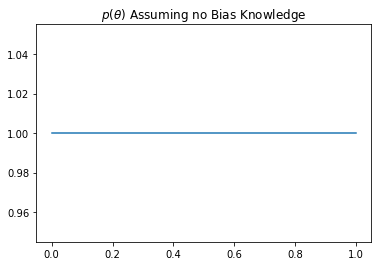

In [8]:
# no information
fig3 = plt.figure()
beta3 = stats.beta(1,1)
plt.plot(theta,beta3.pdf(theta))
plt.title(r'$p(\theta)$ Assuming no Bias Knowledge')

4.3 Perform Bernoulli trials where one of these views is correct.  Show how the posterior distribution of $\theta$ changes for each view for $n$=0, 1, 2, 5, 10, and 100.  Each view should have its own plot, but with the curves of the posterior after different numbers of trials overlayed. (5 pts)

In [9]:
# Stuff which will be useful
def flipCoins(theta,n):
    vals = stats.bernoulli.rvs(theta, size=n)
    y = np.count_nonzero(vals)
    
    return y

n = [0,1,2,5,10,100]

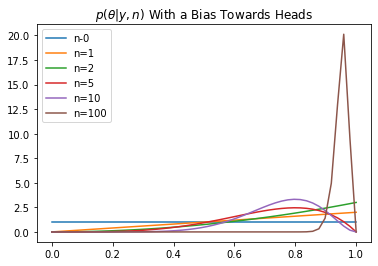

In [10]:
# Heavily bias 'heads'
bias = 0.9

theta = np.linspace(0,1)
fig, ax = plt.subplots(1,1)
for i in n:
    y = flipCoins(bias,i)
    plt.plot(theta,calcBinomialPosterior(y,i,theta))
    plt.title(r'$p(\theta|y,n)$ With a Bias Towards Heads')
plt.legend(['n-0','n=1','n=2','n=5','n=10','n=100'])
plt.show()

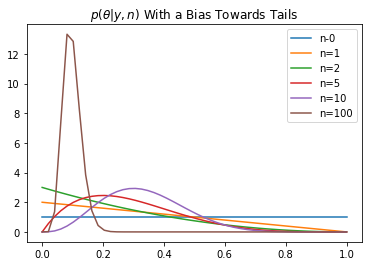

In [11]:
# Heavily bias 'tails'
bias = 0.1

theta = np.linspace(0,1)
fig, ax = plt.subplots(1,1)
for i in n:
    y = flipCoins(bias,i)
    plt.plot(theta,calcBinomialPosterior(y,i,theta))
    plt.title(r'$p(\theta|y,n)$ With a Bias Towards Tails')
plt.legend(['n-0','n=1','n=2','n=5','n=10','n=100'])
plt.show()

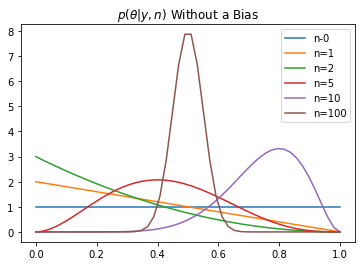

In [12]:
# Evenly biased
bias = 0.5

theta = np.linspace(0,1)
fig, ax = plt.subplots(1,1)
for i in n:
    y = flipCoins(bias,i)
    plt.plot(theta,calcBinomialPosterior(y,i,theta))
    plt.title(r'$p(\theta|y,n)$ Without a Bias')
plt.legend(['n-0','n=1','n=2','n=5','n=10','n=100'])
plt.show()

4.4 Is it possible that each view will always arrive at an accurate estimate of $\theta$?  How might you determine which view is most consistent with the data after $n$ trials? (5 pts)

With enough samples each view should end up with an accurate estimate of $\theta$. Of course the random values could be abnormal (all heads) depending on the seed, but we are assuming representative outputs. I think the way to confirm which is the most consistent is to take the mean-squared error between the "view" prior and the posterior, and whichever has the lowest error is probably the most consistent with the data.

### Q5. Inference using the Poisson distribution (20 pts)

Suppose you observe for 3 seconds and detect a series of events that occur at the following times (in seconds): 0.53, 0.65, 0.91, 1.19, 1.30, 1.33, 1.90, 2.01, 2.48.

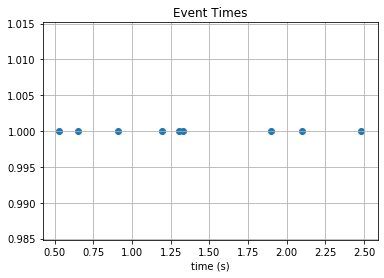

In [20]:
times = [0.53,0.65,0.91,1.19,1.3,1.33,1.9,2.10,2.48]
plt.figure()
plt.scatter(times,np.ones(len(times)))
plt.title('Event Times')
plt.xlabel('time (s)')
plt.grid()

5.1 Model the rate at which the events are produced using a Poisson distribution where $\lambda$ is the number of events $n$ observed per unit time (1 second).  Show the likelihood equation and plot it for three different values of $\lambda$: less, about equal, and greater than what you estimate (intuitively) from the data. (5 pts)

$$p(n|\mathcal{\lambda}) = \frac{\lambda^{n}e^{-\lambda}}{n!}$$

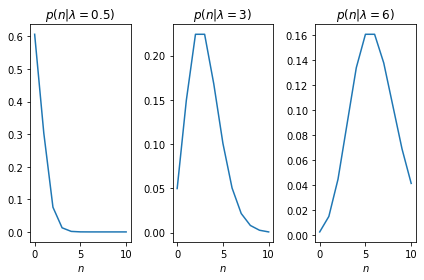

In [24]:
def poissonDist(n,rate):
    dist = stats.poisson.pmf(n,rate)
    return dist

# There are 9 events in 3 seconds, so lambda ~3 Hz intuitively
rate = [0.5,3,6]
n = [0,1,2,3,4,5,6,7,8,9,10]

plt.figure()
plt.subplot(1,3,1)
plt.plot(n,poissonDist(n,rate[0]))
plt.title(r'$p(n|\lambda = 0.5)$')
plt.xlabel(r'$n$')
plt.subplot(1,3,2)
plt.plot(n,poissonDist(n,rate[1]))
plt.title(r'$p(n|\lambda = 3)$')
plt.xlabel(r'$n$')
plt.subplot(1,3,3)
plt.plot(n,poissonDist(n,rate[2]))
plt.title(r'$p(n|\lambda = 6)$')
plt.xlabel(r'$n$')
plt.tight_layout()

5.2 Derive the posterior distribution of $\lambda$ assuming a Gamma prior (usually defined with parameters $\alpha$ and $\beta$).  The posterior should have the form $p(\lambda | n, T, \alpha, \beta)$ where $T$ is the total duration of the observation period and $n$ is the number of events observed within that period. (5 pts)

Given:
$$p(n|\lambda,T) = \frac{(\lambda T)^n}{n!}e^{-\lambda T}$$
$$p(\lambda,T|\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}(\lambda T)^{\alpha-1}e^{-\beta(\lambda T)}$$
Then:
$$p(\lambda|n,T,\alpha,\beta) = \frac{p(n|\lambda,T)p(\lambda,T|\alpha,\beta)}{p(n|T,\alpha,\beta)}$$
$$p(\lambda|n,T,\alpha,\beta) \propto (\lambda T)^ne^{-\lambda T}(\lambda T)^{\alpha-1}e^{-\beta\lambda T}$$
$$p(\lambda|n,T,\alpha,\beta) \propto (\lambda T)^{n+\alpha-1}e^{-(1+\beta)\lambda T}$$

5.3 Show that the Gamma distribution is a *conjugate prior* for the Poisson distribution, i.e. it is also a Gamma distribution, but defined by parameters $\alpha'$ and $\beta'$ that are functions of the prior and likelihood parameters. (5 pts)

$$p(\lambda|n,T,\alpha,\beta) \propto (\lambda T)^{n+\alpha-1}e^{-(1+\beta)\lambda T}$$
$$X = \lambda T, \alpha' = n + \alpha, \beta' = \beta + 1$$
$$Gamma(\alpha',\beta') \propto X^{\alpha'-1}e^{-\beta'X}$$

5.4 Plot the posterior distribution for the data above at times $T$ = 0, 0.5, and 1.5.  Overlay the curves on a single plot.  Comment how it is possible for your beliefs to change even though no new events have been observed. (5 pts)

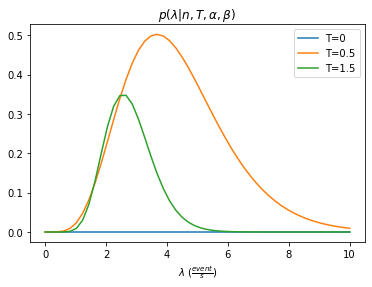

In [26]:
def poissonPosterior(n,T,alpha,beta,lam):
    alphaP = n+alpha
    betaP = beta+1
    posterior = stats.gamma.pdf(lam*T,alphaP,scale=(1/betaP))
    return posterior

# These values were chosen because they generate a distribution which matches the intuitive lambda location
alpha = 6.5
beta = 2
T = [0,0.5,1.5]
nT = [0,0,6]
lam = np.linspace(0,10)
plt.figure()
plt.plot(lam,poissonPosterior(nT[0],T[0],alpha,beta,lam))
plt.plot(lam,poissonPosterior(nT[1],T[1],alpha,beta,lam))
plt.plot(lam,poissonPosterior(nT[2],T[2],alpha,beta,lam))
plt.legend(['T=0','T=0.5','T=1.5'])
plt.xlabel(r'$\lambda$ $(\frac{event}{s})$')
plt.title(r'$p(\lambda|n,T,\alpha,\beta)$')
plt
plt.show()

Our belief is able to update even without any new events because our posterior,
$$p(\lambda|n,T,\alpha,\beta) \propto (\lambda T)^{n+\alpha-1}e^{-(1+\beta)\lambda T},$$
is dependent on both $T$ and $n$. So even when $n$ hasn't increased, $T$ still changes the shape of the posterior distribution. This makes intuitive sense, because the fact that no new events have happened between two sample times should influence what the possible average rate of events.

### Q6. Exploration (40 pts)

In these problems, you are meant to do creative exploration.  Define and explore:

6.1 A discrete inference problem (20 pts)

6.2 A continuous inference problem (20 pts)

This is meant to be open-ended; you should not feel the need to write a book chapter; but neither should you just change the numbers in one of the problems above.  After doing the readings and problems above, you should pick a concept you want to understand better or an simple modeling idea you want to try out.  You can also start to explore ideas for your project.  The general idea is for you to teach yourself (and potentially a classate) about a concept from the assignments and readings or solidify your understanding of required technical background. For additional guidance, see the grading rubric below.

You can use the readings and other sources for inspiration, but here are a few ideas:
- An inference problem using categorical data
- A disease for which there are two different tests
- A two-dimensional continuous inference problem
- The idea of a conjugate prior


#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|     | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. | 
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|